In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Load data

In [3]:
print(df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'target'], dtype='object')


In [4]:
# Load PCA-transformed or preprocessed dataset
df = pd.read_csv('../data/heart_disease_pca.csv') 

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


In [5]:
# --- Random Forest Feature Importance ---
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Extract Features

In [6]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

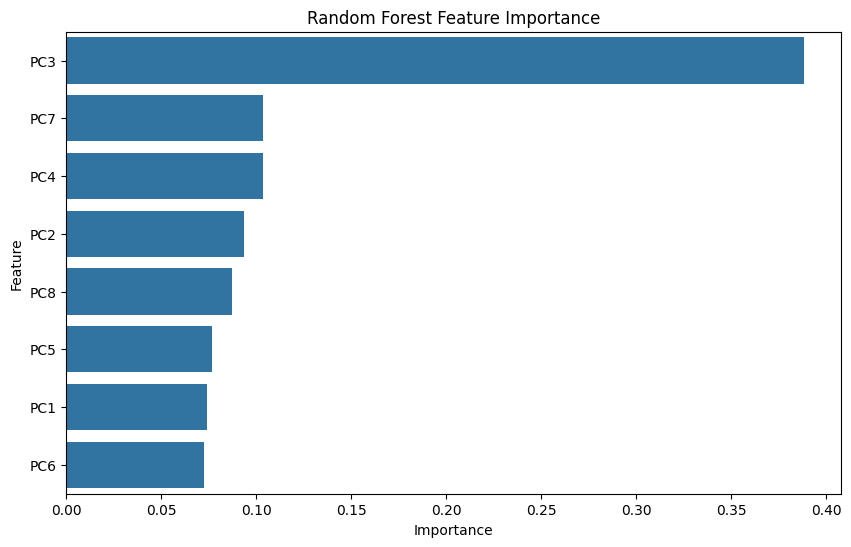

In [7]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [8]:
# --- Recursive Feature Elimination (RFE) ---
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as the estimator
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=5)  # select top 5 features
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [9]:
# Print selected features
selected_features_rfe = X.columns[rfe.support_]
print("Top features selected by RFE:", list(selected_features_rfe))

# --- Chi-Square Test ---
# Scale features to [0,1] for chi2 test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_scores, p_values = chi2(X_scaled, y)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi_scores, 'p_value': p_values})
chi2_df = chi2_df.sort_values(by='Chi2_Score', ascending=False)

Top features selected by RFE: ['PC3', 'PC4', 'PC5', 'PC6', 'PC7']


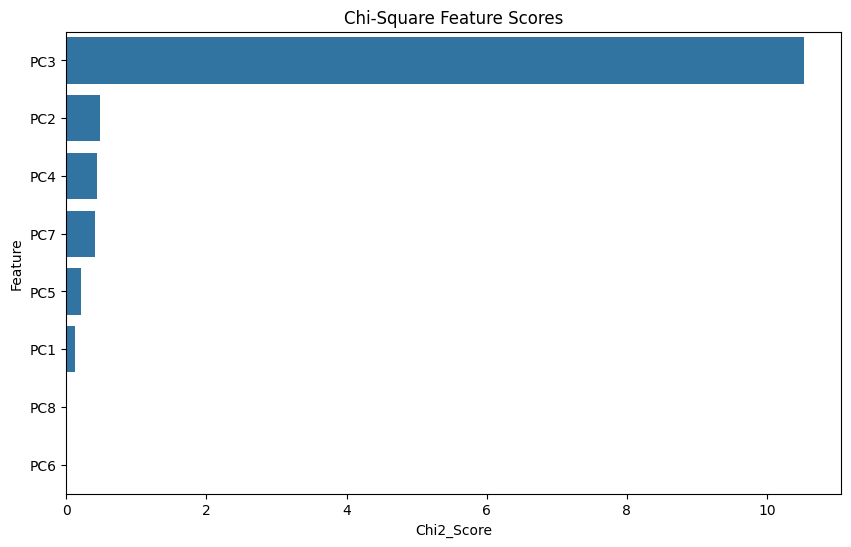

In [10]:
# Plot Chi-Square Scores
plt.figure(figsize=(10,6))
sns.barplot(x='Chi2_Score', y='Feature', data=chi2_df)
plt.title('Chi-Square Feature Scores')
plt.show()

# --- Select final key features (intersection of methods or top scores) ---
# Example: take top 5 from Random Forest + RFE + Chi2
top_rf_features = feature_importance_df['Feature'].head(5).tolist()
top_chi_features = chi2_df['Feature'].head(5).tolist()
top_rfe_features = list(selected_features_rfe)


In [11]:
# Combine and remove duplicates
final_features = list(set(top_rf_features + top_chi_features + top_rfe_features))
print("Final selected key features:", final_features)

Final selected key features: ['PC5', 'PC4', 'PC6', 'PC2', 'PC8', 'PC3', 'PC7']


In [12]:
# Save reduced dataset with key features
reduced_df = df[final_features + ['target']]
reduced_df.to_csv('../data/heart_disease_selected_features.csv', index=False)